Define the uncertainties,levers and outcomes.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import platypus


from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.evaluators import Samplers
from ema_workbench.em_framework.points import Scenario

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem


In [1]:
# parts of ema-workbench so far used
from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy,
                           MultiprocessingEvaluator,SequentialEvaluator)
from ema_workbench.em_framework.points import Scenario

from problem_formulation import get_model_for_problem_formulation

# other libraries needed
import pandas as pd

In [2]:
# setting up the model as usual
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(3)

In [5]:
lower_bound_ref_sce = {}
for uncertainty in dike_model.uncertainties:
    lower_bound_ref_sce[uncertainty.name] = uncertainty.lower_bound
lower_bound_ref_sce

{'discount rate 0': 0,
 'discount rate 1': 0,
 'discount rate 2': 0,
 'A.0_ID flood wave shape': 0,
 'A.1_Bmax': 30,
 'A.1_pfail': 0,
 'A.1_Brate': 0,
 'A.2_Bmax': 30,
 'A.2_pfail': 0,
 'A.2_Brate': 0,
 'A.3_Bmax': 30,
 'A.3_pfail': 0,
 'A.3_Brate': 0,
 'A.4_Bmax': 30,
 'A.4_pfail': 0,
 'A.4_Brate': 0,
 'A.5_Bmax': 30,
 'A.5_pfail': 0,
 'A.5_Brate': 0}

In [7]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_otpimization = evaluator.optimize(nfe=10, reference  = Scenario(**lower_bound_ref_sce),
                                  searchover='levers', 
                                  epsilons=[0.1,]*len(dike_model.outcomes))

[MainProcess/INFO] pool started with 4 workers
100it [02:15,  1.35s/it]                                                       
[MainProcess/INFO] optimization completed, found 71 solutions
[MainProcess/INFO] terminating pool


In [8]:
results_otpimization

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1,0,0,0,0,1,1,1,1,1,...,2.852378e+08,0.003153,4.477998e+08,0.038308,5.317359e+07,0.000361,7.697583e+08,0.038908,7.718000e+08,25478.933186
1,1,1,0,0,1,0,0,0,0,0,...,5.081987e+08,0.068774,2.983991e+09,0.810566,6.557381e+07,0.000000,1.301689e+08,0.001910,1.141600e+09,39979.874938
2,1,0,1,0,1,0,0,1,0,1,...,3.151545e+08,0.001543,1.321152e+08,0.026863,9.917740e+07,0.011266,1.354565e+08,0.000000,1.172300e+09,0.000000
3,0,0,0,1,0,1,0,1,0,1,...,4.745410e+08,0.039531,1.333524e+08,0.000000,5.333646e+07,0.000697,1.409566e+08,0.002180,1.355800e+09,4653.647747
4,0,0,1,0,1,1,0,0,1,1,...,2.584253e+08,0.000000,1.797476e+09,0.477251,2.542135e+07,0.000038,1.998181e+08,0.007677,1.305500e+09,21119.517864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0,0,0,0,1,1,1,1,1,...,5.181994e+08,0.043448,9.839363e+07,0.003101,3.517600e+07,0.000019,1.695362e+08,0.000955,1.064500e+09,4347.608616
67,1,0,0,0,0,1,1,0,0,0,...,8.586446e+08,0.282594,1.056227e+08,0.000000,1.004348e+08,0.012767,1.243445e+09,0.490923,7.104000e+08,0.000000
68,0,0,1,1,0,1,0,1,1,1,...,2.475600e+08,0.010499,1.506647e+09,0.394721,3.795410e+07,0.000210,4.623573e+08,0.053625,1.336200e+09,24171.275088
69,1,1,1,1,1,0,0,0,0,1,...,6.022023e+08,0.030843,1.145811e+09,0.124855,6.185598e+07,0.000000,1.332879e+08,0.000156,1.053000e+09,31533.372513


In [28]:
# other way to set the reference scenario: using average
ref_scenario_descprition = {}

for i in [0, 1, 2]:
    ref_scenario_descprition['discount rate ' + str(i)] = 2.5
    
ref_scenario_descprition['A.0_ID flood wave shape'] = 5

for dike_ring in ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']:   
    ref_scenario_descprition[dike_ring + "_Bmax"] = 190
    ref_scenario_descprition[dike_ring + "_pfail"] = 0.5
    ref_scenario_descprition[dike_ring + "_Brate"] = 1.5
    
ref_scenario_descprition

{'discount rate 0': 2.5,
 'discount rate 1': 2.5,
 'discount rate 2': 2.5,
 'A.0_ID flood wave shape': 5,
 'A.1_Bmax': 190,
 'A.1_pfail': 0.5,
 'A.1_Brate': 1.5,
 'A.2_Bmax': 190,
 'A.2_pfail': 0.5,
 'A.2_Brate': 1.5,
 'A.3_Bmax': 190,
 'A.3_pfail': 0.5,
 'A.3_Brate': 1.5,
 'A.4_Bmax': 190,
 'A.4_pfail': 0.5,
 'A.4_Brate': 1.5,
 'A.5_Bmax': 190,
 'A.5_pfail': 0.5,
 'A.5_Brate': 1.5}

In [29]:
with SequentialEvaluator(dike_model) as evaluator:
    results_otpimization = evaluator.optimize(nfe=2, reference  = Scenario(**ref_scenario_descprition),
                                  searchover='levers', 
                                  epsilons=[0.1,]*len(dike_model.outcomes))

100it [07:28,  4.48s/it]                                                       
[MainProcess/INFO] optimization completed, found 71 solutions


In [8]:
results_otpimization.to_csv("intermediate outputs/optimization output.csv")

In [13]:
from ema_workbench.analysis import parcoords

data = results1.loc[:, [o.name for o in results_otpimization.outcomes]]
limits = parcoords.get_limits(data) 
limits.loc[0, ['All Costs', 'Expected Number of Deaths']] = 0   #more outcomes to be completed 

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis('Expected Number of Deaths')
plt.show()

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


NameError: name 'model' is not defined

In [ ]:
with MultiprocessingEvaluator(model) as evaluator:
    results2 = evaluator.optimize(nfe=5e3, searchover='levers',
                                 epsilons=[0.01,]*len(model.outcomes))

In [ ]:
data = results2.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)
limits.loc[0, ['All Costs','Expected Number of Deaths' ]] = 0   #more outcomes to be completed 

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
paraxes.invert_axis('Expected Number of Deaths')
plt.show()

Our version

In [5]:
# This is a sample Python script.

import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

# ema_workbench components needed
from ema_workbench import (MultiprocessingEvaluator)
from ema_workbench.em_framework.points import Scenario
from ema_workbench.analysis import parcoords

# model functions needed
from problem_formulation import get_model_for_problem_formulation

# other libraries needed
import time  # to keep track of the runtime

if __name__ == '__main__':

    start_time = time.time()
    print('Runtime started')

    problem_formulation = 3
    nfe_selection = 5
    epsilon_selection = [0.1]

    # our way to set the initial reference scenario: using average
    ref_scenario_description = {}
    for i in [0, 1, 2]:
        ref_scenario_description['discount rate ' + str(i)] = 2.5
    ref_scenario_description['A.0_ID flood wave shape'] = 5
    for dike_ring in ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']:
        ref_scenario_description[dike_ring + "_Bmax"] = 190
        ref_scenario_description[dike_ring + "_pfail"] = 0.5
        ref_scenario_description[dike_ring + "_Brate"] = 1.5

    dike_model, planning_steps = get_model_for_problem_formulation(problem_formulation)

    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.optimize(nfe=nfe_selection,
                                     reference=Scenario(**ref_scenario_description),
                                     searchover='levers',
                                     epsilons=epsilon_selection * len(dike_model.outcomes))

    end_time = time.time()
    print('Runtime ended with duration of', str(end_time - start_time))

    results.to_csv("intermediate outputs/prova.csv")

Runtime started


[MainProcess/INFO] pool started with 4 workers
100it [03:23,  2.04s/it]                                                       
[MainProcess/INFO] optimization completed, found 83 solutions
[MainProcess/INFO] terminating pool


Runtime ended with duration of 224.93269181251526


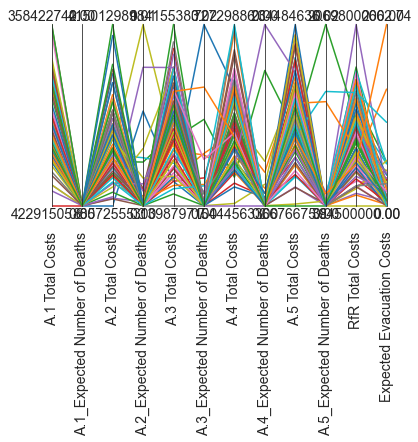

In [6]:
# visualization in the parallel coordinate plots
data = results.loc[:, [o.name for o in dike_model.outcomes]] # we are keeping just the columns with the outcomes
limits = parcoords.get_limits(data) # creates a dataframe where for each outcome it gets the highest and lowest value
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0 # sets the lowerbound of each outcome to 0

paraxes = parcoords.ParallelAxes(limits) # creates the parallel axes
paraxes.plot(data) # put the data on the axes
#paraxes.invert_axis('max_P') # flip direction for a particular outcome
plt.show() # plots

In [7]:
type(paraxes)

ema_workbench.analysis.parcoords.ParallelAxes

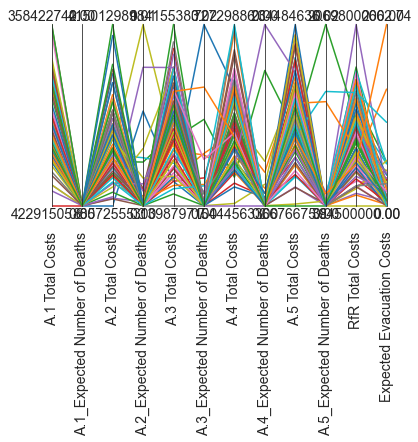

In [9]:
from ema_workbench.analysis import parcoords

from problem_formulation import get_model_for_problem_formulation

import pandas as pd
import matplotlib.pyplot as plt

# read the data
results = pd.read_csv('intermediate outputs/prova (PF 3).csv')

dike_model, planning_steps = get_model_for_problem_formulation(3)

# visualization in the parallel coordinate plots
data = results.loc[:, [o.name for o in dike_model.outcomes]] # we are keeping just the columns with the outcomes
limits = parcoords.get_limits(data) # creates a dataframe where for each outcome it gets the highest and lowest value
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0 # sets the lowerbound of each outcome to 0

paraxes = parcoords.ParallelAxes(limits) # creates the parallel axes
paraxes.plot(data) # put the data on the axes
#paraxes.invert_axis('max_P') # flip direction for a particular outcome

# save figure
plt.savefig('output pictures/results first optimization - prova.png')

plt.show() # plots

In [13]:
for o in dike_model.outcomes:
    print(o.name)

A.1 Total Costs
A.1_Expected Number of Deaths
A.2 Total Costs
A.2_Expected Number of Deaths
A.3 Total Costs
A.3_Expected Number of Deaths
A.4 Total Costs
A.4_Expected Number of Deaths
A.5 Total Costs
A.5_Expected Number of Deaths
RfR Total Costs
Expected Evacuation Costs
